In [1]:
import os
import sys

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

import nibabel as nib
from matplotlib.colors import LinearSegmentedColormap


print(sys.path)
%pwd

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

from classes.regdata import RegData
from funcs.reloads import Reloader
from classes.natspatpred import NatSpatPred
from classes.voxelsieve import VoxelSieve

['/home/rfpred/notebooks/construction_work', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred/notebooks/alien_nbs/lgnpy', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsd_access-0.0.1.dev0-py3.11.egg', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/cifti-1.1-py3.11.egg']


In [2]:
NSP = NatSpatPred()
NSP.initialise(verbose=True)
# importlib.reload(funcs.brain_mapping)
from funcs.brain_mapping import reg_to_nifti, vol_to_surf

rd = RegData
rl = Reloader

Naturalistic Spatial Prediction class: Initialised

Class contains the following attributes:
 .analyse
 .attributes
 .cortex
 .datafetch
 .explore
 .hidden_methods
 .initialise
 .nsd_datapath
 .own_datapath
 .stimuli
 .subjects
 .utils


In [10]:
# for subject in NSP.subjects:
    # for angle in [90, 210, 330]:
subject = "subj01"
angle = 90
    
vgg16results = rd(subject=subject, folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}_gabor", model="vggfull", statistic="delta_r", verbose=False, skip_norm_lay = True) # Norm layer is not in the encoding featmaps (i think)
datfram = vgg16results.df
# vgg16results.assign_layers(max_or_weighted="max",
#                         verbose=True,
#                         title=f"Unpredictability layer assignment across visual cortex ecc 2.0 angle {angle}\nVGG16, ΔR based (Baseline vs. Baseline + Unpredictability)",
#                         #   figsize = (6 , 5.5))
#                         figsize = (6.5 , 5))

# vgg16results.mean_lines(fit_polynom = False,
#             polynom_order = 4,
#             verbose = True,
#             plot_catplot = False,
#             title = "Layer-specific unpredictability effect across visual cortex\nVGG16, Δβ based (Baseline vs. Baseline + Unpredictability)")

datfram

,x,y,z,roi,delta_r_2,delta_r_3,delta_r_4,delta_r_5,delta_r_6,delta_r_7,delta_r_8,delta_r_9,delta_r_10,delta_r_11,delta_r_12,delta_r_13,delta_r_14,delta_r_15,delta_r_16,delta_r_17
0,63,17,55,V1,0.014806,0.015336,0.014465,1.427666e-02,0.013970,0.013690,0.013273,0.012857,0.012563,0.011665,0.009896,0.006554,0.004568,0.007226,0.014806,0.015336
1,67,6,66,V1,0.026967,0.027290,0.026288,2.585931e-02,0.026171,0.025025,0.022433,0.021794,0.021650,0.020940,0.019814,0.015838,0.012814,0.020273,0.026967,0.027290
2,67,8,65,V1,0.043803,0.044003,0.043533,4.317094e-02,0.043674,0.042395,0.039442,0.038262,0.037467,0.036085,0.034159,0.027708,0.022737,0.030537,0.043803,0.044003
3,67,9,64,V1,0.050901,0.051065,0.051214,5.097084e-02,0.051476,0.050496,0.047962,0.046595,0.045454,0.043533,0.040611,0.032275,0.026210,0.033884,0.050901,0.051065
4,67,9,66,V1,0.009871,0.010096,0.009996,9.843606e-03,0.009894,0.009525,0.008777,0.008309,0.008038,0.007740,0.007734,0.006895,0.005842,0.006552,0.009871,0.010096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,96,33,72,V4,0.000725,0.000670,0.000844,8.755191e-04,0.000820,0.000974,0.001429,0.001635,0.001654,0.001624,0.001194,0.000461,0.000202,0.000744,0.000725,0.000670
189,96,34,72,V4,0.001076,0.001090,0.001088,1.105122e-03,0.001033,0.001117,0.001357,0.001543,0.001618,0.001496,0.000940,0.000250,0.000115,0.000644,0.001076,0.001090
190,112,28,63,V4,-0.000710,-0.000793,-0.000730,-7.100114e-04,-0.000600,-0.000640,-0.000795,-0.000764,-0.000691,-0.000562,-0.000214,0.000343,0.000521,-0.000134,-0.000710,-0.000793
191,112,31,63,V4,0.005458,0.005296,0.005283,5.175449e-03,0.005436,0.005496,0.005188,0.005316,0.005467,0.005711,0.006157,0.006048,0.005493,0.004636,0.005458,0.005296


In [27]:
# Peripheral results, delta r unpredictability
for angle_no, angle in enumerate([90, 210, 330]):

    results = rd(
        subject=subject,
        folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}_gabor",
        model="vggfull",
        statistic="delta_r",
        verbose=False,
        skip_norm_lay=True,
    )  # Norm layer is not in the encoding featmaps (i think)
    if angle_no == 0:
        peri_df = results.df
    else:
        peri_df = pd.concat([peri_df, results.df])

# datfram["roi"]

In [28]:
peri_df

,x,y,z,roi,delta_r_2,delta_r_3,delta_r_4,delta_r_5,delta_r_6,delta_r_7,delta_r_8,delta_r_9,delta_r_10,delta_r_11,delta_r_12,delta_r_13,delta_r_14,delta_r_15,delta_r_16,delta_r_17
0,63,17,55,V1,0.014806,0.015336,0.014465,0.014277,0.013970,0.013690,0.013273,0.012857,0.012563,0.011665,0.009896,0.006554,0.004568,0.007226,0.014806,0.015336
1,67,6,66,V1,0.026967,0.027290,0.026288,0.025859,0.026171,0.025025,0.022433,0.021794,0.021650,0.020940,0.019814,0.015838,0.012814,0.020273,0.026967,0.027290
2,67,8,65,V1,0.043803,0.044003,0.043533,0.043171,0.043674,0.042395,0.039442,0.038262,0.037467,0.036085,0.034159,0.027708,0.022737,0.030537,0.043803,0.044003
3,67,9,64,V1,0.050901,0.051065,0.051214,0.050971,0.051476,0.050496,0.047962,0.046595,0.045454,0.043533,0.040611,0.032275,0.026210,0.033884,0.050901,0.051065
4,67,9,66,V1,0.009871,0.010096,0.009996,0.009844,0.009894,0.009525,0.008777,0.008309,0.008038,0.007740,0.007734,0.006895,0.005842,0.006552,0.009871,0.010096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,46,24,60,V4,0.004317,0.004778,0.004820,0.004818,0.004664,0.004663,0.004525,0.004292,0.004192,0.003688,0.002652,0.000918,0.000153,0.000456,0.004317,0.004778
194,49,25,60,V4,0.003999,0.003339,0.003060,0.003013,0.003189,0.002590,0.001743,0.001658,0.001595,0.001699,0.002136,0.002741,0.003046,0.008180,0.003999,0.003339
195,49,26,60,V4,0.003381,0.002890,0.002570,0.002568,0.002674,0.002217,0.001577,0.001476,0.001418,0.001431,0.001598,0.001692,0.001759,0.006104,0.003381,0.002890
196,96,22,60,V4,0.012616,0.012229,0.012623,0.012570,0.012653,0.012210,0.011703,0.011319,0.010636,0.010070,0.009158,0.007346,0.006319,0.009933,0.012616,0.012229


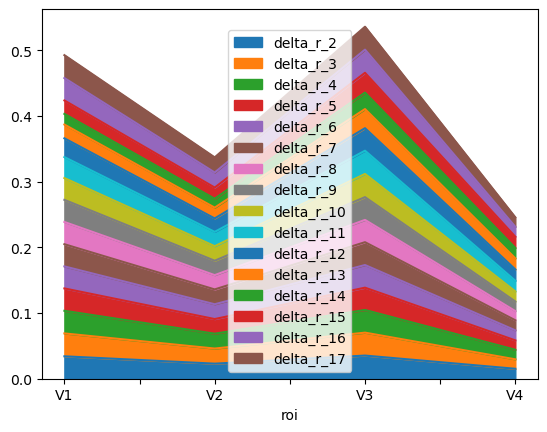

In [29]:
# Group by 'roi' and calculate the mean, excluding the first three columns
grouped = peri_df.iloc[:, 3:].groupby('roi').mean()

# Plot the mean values
grouped.plot(kind='area')

# Show the plot
plt.show()

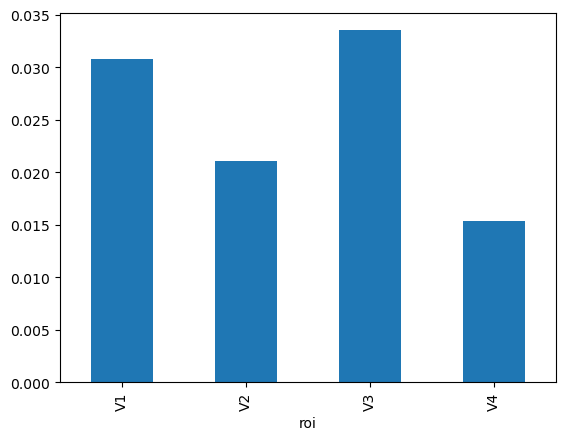

In [35]:
# Group by 'roi' and calculate the mean, excluding the first three columns
grouped = peri_df.iloc[:, 3:].groupby('roi').mean()

# Calculate the mean over all columns
peri_mean = grouped.mean(axis=1)

# Plot the mean values
peri_mean.plot(kind='bar')

# Show the plot
plt.show()

### Central patch unpredictability delta r dataframe

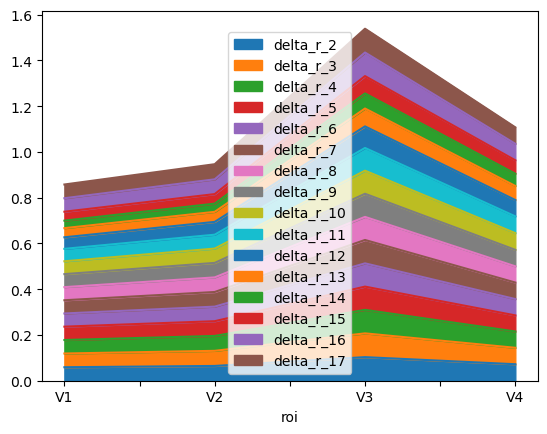

In [32]:
fov_results = rd(
    subject=subject,
    folder=f"unpred/vggfull_gabor_baseline",
    model="vggfull",
    statistic="delta_r",
    verbose=False,
    skip_norm_lay=True,
)  # Norm layer is not in the encoding featmaps (i think)

fov_df = fov_results.df

# Group by 'roi' and calculate the mean, excluding the first three columns
grouped = fov_df.iloc[:, 3:].groupby('roi').mean()

# Plot the mean values
grouped.plot(kind='area')

# Show the plot
plt.show()

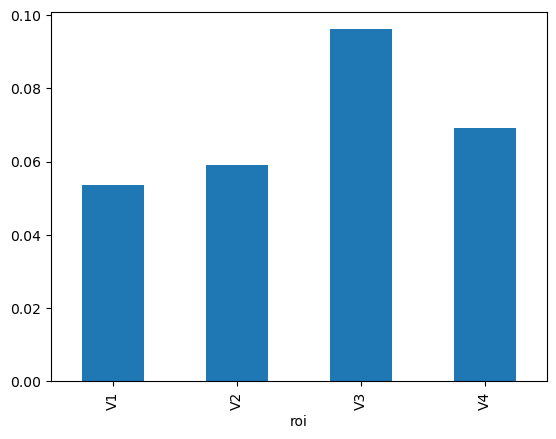

In [36]:
# Group by 'roi' and calculate the mean, excluding the first three columns
grouped = fov_df.iloc[:, 3:].groupby('roi').mean()

# Calculate the mean over all columns
fov_mean = grouped.mean(axis=1)

# Plot the mean values
fov_mean.plot(kind='bar')

# Show the plot
plt.show()

In [74]:
peri_fov_df =  pd.concat([fov_mean, peri_mean], axis=1)

peri_fov_df.columns = ['Fovea', 'Para-foveal']
peri_fov_df

,Fovea,Para-foveal
roi,,
V1,0.053601,0.030791
V2,0.059145,0.021063
V3,0.096151,0.033496
V4,0.069210,0.015358


/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site

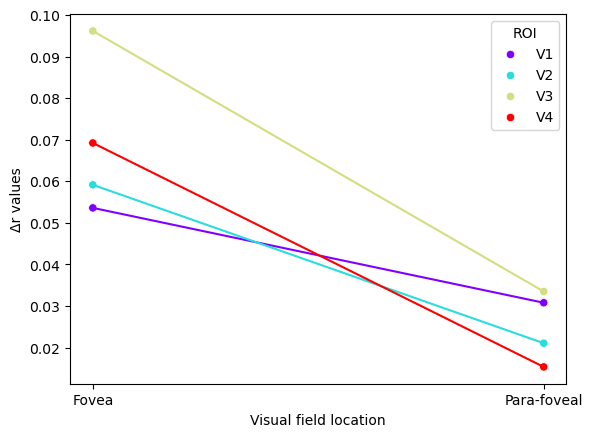

In [76]:
def fovperi_plot()

peri_fov_df = peri_fov_df.reset_index()

# Create a color map based on the unique values in the 'roi' column
colors = plt.cm.rainbow(np.linspace(0, 1, len(peri_fov_df['roi'].unique())))

# Melt the dataframe to long format for easier plotting with seaborn
long_df = peri_fov_df.melt(id_vars='roi', value_vars=['Fovea', 'Para-foveal'], var_name='a', value_name='Δr values')

# Create a color palette with a different color for each unique 'roi' value
palette = dict(zip(peri_fov_df['roi'].unique(), colors))

# Create the line plot without a legend
sns.lineplot(x='a', y='Δr values', hue='roi', data=long_df, palette=palette, legend=False)

# Add the scatter plot
sns.scatterplot(x='a', y='Δr values', hue='roi', data=long_df, palette=palette)

# Change the x-axis title
plt.xlabel('Visual field location')

# Get the current legend
legend = plt.legend()

# Change the legend title
legend.set_title("ROI")

plt.show()

In [84]:
def fovperi_plot(subject:str, statistic:str="delta_r"):
    """Quick lazy function to plot individual subject mean values of foveal and parafoveal unpredictability 

    Args:
        subject (str): The subject
    """    
    
    # Foveal results, delta r unpredictability
    fov_results = rd(
    subject=subject,
    folder=f"unpred/vggfull_gabor_baseline",
    model="vggfull",
    statistic=statistic,
    verbose=False,
    skip_norm_lay=True,
    )  # Norm layer is not in the encoding featmaps (i think)

    fov_df = fov_results.df

    # Group by 'roi' and calculate the mean, excluding the first three columns
    fov_grouped = fov_df.iloc[:, 3:].groupby('roi').mean()

    # Calculate the mean over all columns
    fov_mean = fov_grouped.mean(axis=1)

    # Peripheral results, delta r unpredictability
    for angle_no, angle in enumerate([90, 210, 330]):

        results = rd(
            subject=subject,
            folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}_gabor",
            model="vggfull",
            statistic=statistic,
            verbose=False,
            skip_norm_lay=True,
        )  # Norm layer is not in the encoding featmaps (i think)
        if angle_no == 0:
            peri_df = results.df
        else:
            peri_df = pd.concat([peri_df, results.df])

    # Group by 'roi' and calculate the mean, excluding the first three columns
    peri_grouped = peri_df.iloc[:, 3:].groupby('roi').mean()

    # Calculate the mean over all columns
    peri_mean = grouped.mean(axis=1)
    
    peri_fov_df =  pd.concat([fov_mean, peri_mean], axis=1)

    peri_fov_df.columns = ['Fovea', 'Para-foveal']
        
    peri_fov_df = peri_fov_df.reset_index()

    # Create a color map based on the unique values in the 'roi' column
    colors = plt.cm.rainbow(np.linspace(0, 1, len(peri_fov_df['roi'].unique())))

    # Melt the dataframe to long format for easier plotting with seaborn
    long_df = peri_fov_df.melt(id_vars='roi', value_vars=['Fovea', 'Para-foveal'], var_name='a', value_name='Δr values')

    # Create a color palette with a different color for each unique 'roi' value
    palette = dict(zip(peri_fov_df['roi'].unique(), colors))

    # Create the line plot without a legend
    sns.lineplot(x='a', y='Δr values', hue='roi', data=long_df, palette=palette, legend=False)

    # Add the scatter plot
    sns.scatterplot(x='a', y='Δr values', hue='roi', data=long_df, palette=palette)

    # Change the x-axis title
    plt.xlabel('Visual field location')

    # Get the current legend
    legend = plt.legend()

    # Change the legend title
    legend.set_title("ROI")

    plt.show()

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site

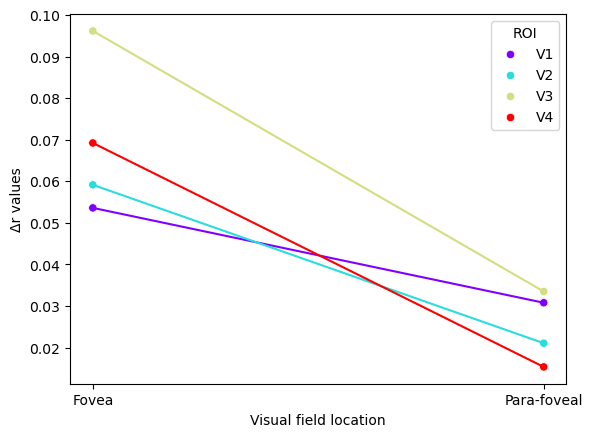

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site

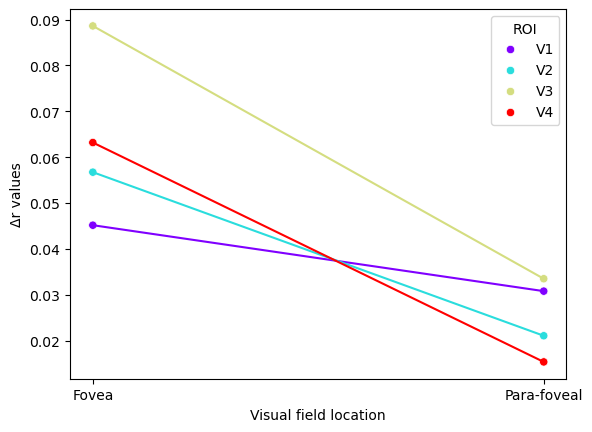

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site

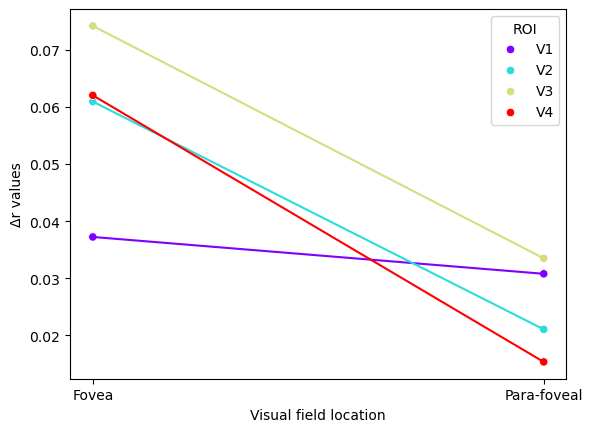

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site

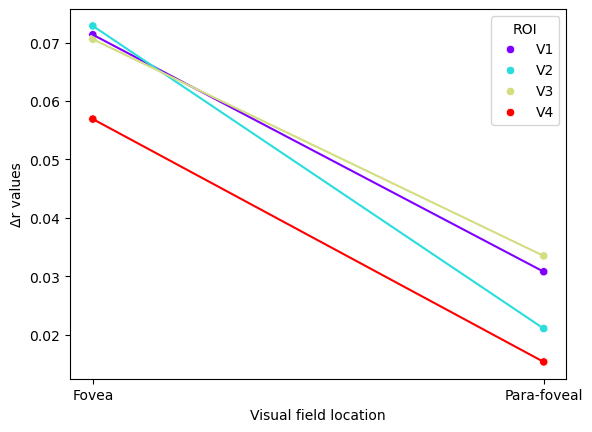

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site

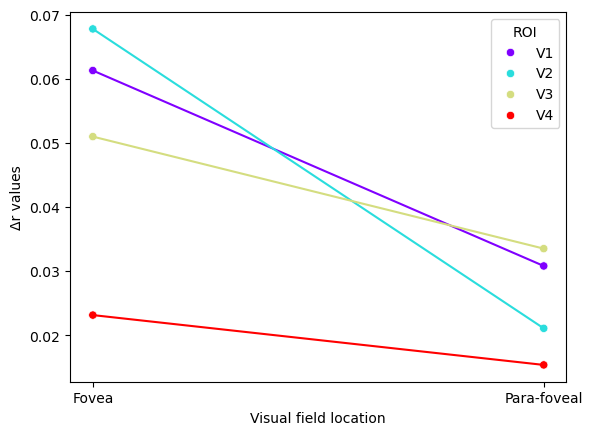

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site

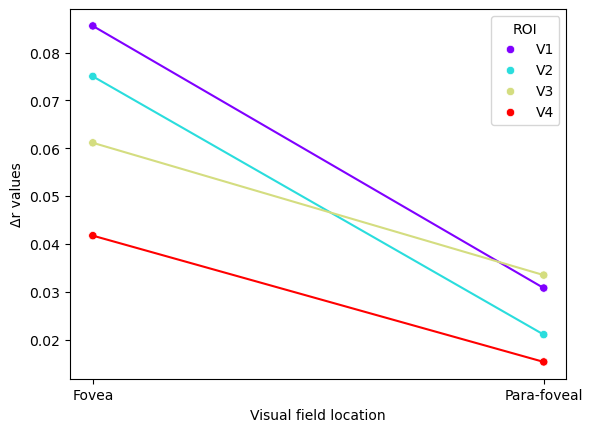

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site

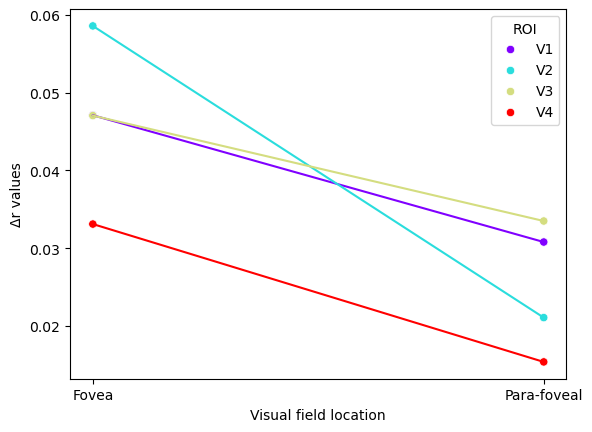

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rfpred/envs/rfenv/lib/python3.11/site

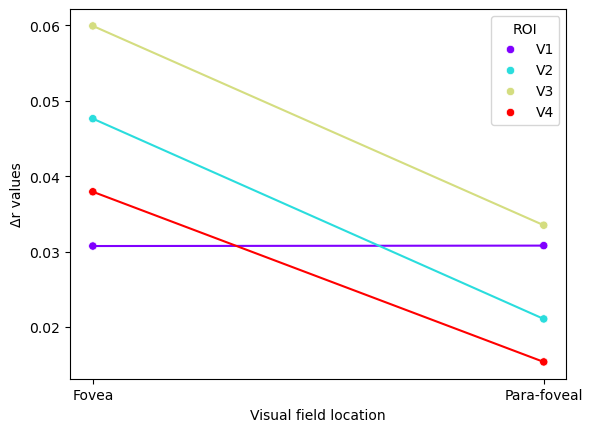

In [85]:
for subject in NSP.subjects:
    fovperi_plot(subject, "delta_r")
    # print(subject)

In [100]:
def _get_fovea_df(subject:str, statistic:str="delta_r"):
    # Foveal results, delta r unpredictability
    fov_results = rd(
        subject=subject,
        folder=f"unpred/vggfull_gabor_baseline",
        model="vggfull",
        statistic=statistic,
        verbose=False,
        skip_norm_lay=True,
    )  # Norm layer is not in the encoding featmaps (i think)

    fov_df = fov_results.df

    # Group by 'roi' and calculate the mean, excluding the first three columns
    fov_grouped = fov_df.iloc[:, 3:].groupby('roi').mean()

    # Calculate the mean over all columns
    fov_mean = fov_grouped.mean(axis=1)

    return fov_mean

def _get_peri_df(subject:str, statistic:str, angles:list=[90, 210, 330]):
    
    # Peripheral results, delta r unpredictability
    for angle_no, angle in enumerate(angles):

        results = rd(
            subject=subject,
            folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}_gabor",
            model="vggfull",
            statistic=statistic,
            verbose=False,
            skip_norm_lay=True,
        )  # Norm layer is not in the encoding featmaps (i think)
        if angle_no == 0:
            peri_df = results.df
        else:
            peri_df = pd.concat([peri_df, results.df])

    # Group by 'roi' and calculate the mean, excluding the first three columns
    peri_grouped = peri_df.iloc[:, 3:].groupby('roi').mean()

    # Calculate the mean over all columns
    peri_mean = peri_grouped.mean(axis=1)

    return peri_mean

def _plot_df(peri_fov_df):
    # Create a color map based on the unique values in the 'roi' column
    colors = plt.cm.rainbow(np.linspace(0, 1, len(peri_fov_df['roi'].unique())))

    # Melt the dataframe to long format for easier plotting with seaborn
    long_df = peri_fov_df.melt(id_vars='roi', value_vars=['Fovea', 'Para-foveal'], var_name='a', value_name='Δr values')

    # Create a color palette with a different color for each unique 'roi' value
    palette = dict(zip(peri_fov_df['roi'].unique(), colors))

    # Create the line plot without a legend
    sns.lineplot(x='a', y='Δr values', hue='roi', data=long_df, palette=palette, legend=False)

    # Add the scatter plot
    sns.scatterplot(x='a', y='Δr values', hue='roi', data=long_df, palette=palette)

    # Change the x-axis title
    plt.xlabel('Visual field location')

    # Get the current legend
    legend = plt.legend()

    # Change the legend title
    legend.set_title("ROI")

    plt.show()

def fovperi_plot(subject:str, statistic:str="delta_r", angles:list=[90, 210, 330]):
    """Quick lazy function to plot individual subject mean values of foveal and parafoveal unpredictability 

    Args:
        subject (str): The subject
    """    
    fov_mean = _get_fovea_df(subject, statistic)
    peri_mean = _get_peri_df(subject, statistic, angles)
    
    peri_fov_df =  pd.concat([fov_mean, peri_mean], axis=1)

    peri_fov_df.columns = ['Fovea', 'Para-foveal']
        
    peri_fov_df = peri_fov_df.reset_index()

    _plot_df(peri_fov_df)

In [191]:
# def fovperi_plot(subjects, statistic:str="delta_r", angles:list=[90, 210, 330]):
#     """Quick lazy function to plot individual subject mean values of foveal and parafoveal unpredictability 

#     Args:
#         subjects (str or list): The subject(s)
#     """    
#     # If subjects is a string, make it a list
#     if isinstance(subjects, str):
#         subjects = [subjects]

#     # Calculate the number of rows and columns for the subplots
#     num_plots = len(subjects)
#     num_rows = int(math.sqrt(num_plots))
#     num_cols = num_plots // num_rows
#     num_cols += num_plots % num_rows

#     # Create subplots
#     fig, axs = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 4 * num_rows))

#     # If there's only one subplot, axs is not a list
#     if num_plots == 1:
#         axs = [axs]

#     # If axs is a numpy array, ravel it
#     if isinstance(axs, np.ndarray):
#         axs = axs.ravel()

#     for ax, subject in zip(axs, subjects):
#         fov_mean = _get_fovea_df(subject, statistic)
#         peri_mean = _get_peri_df(subject, statistic, angles)

#         peri_fov_df =  pd.concat([fov_mean, peri_mean], axis=1)

#         peri_fov_df.columns = ['Fovea', 'Para-foveal']

#         peri_fov_df = peri_fov_df.reset_index()

#         _plot_df(peri_fov_df, ax, subject)

#     # Remove unused subplots
#     for ax in axs[num_plots:]:
#         fig.delaxes(ax)

#     plt.tight_layout()
#     plt.show()

def fovperi_plot(subjects, statistic:str="delta_r", angles:list=[90, 210, 330]):
    """Quick lazy function to plot individual subject mean values of foveal and parafoveal unpredictability 

    Args:
        subjects (str or list): The subject(s)
    """    
    # If subjects is a string, make it a list
    if isinstance(subjects, str):
        subjects = [subjects]

    # Calculate the number of rows and columns for the subplots
    num_plots = len(subjects)
    num_rows = int(math.sqrt(num_plots))
    num_cols = num_plots // num_rows
    num_cols += num_plots % num_rows

    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 4 * num_rows))

    # Set a title for the entire figure
    fig.suptitle(f"Unpredictability sensitivity effects for foveal vs. para-foveal natural image patches (para-foveal patches at angles: {angles})", fontsize=16)

    # If there's only one subplot, axs is not a list
    if num_plots == 1:
        axs = [axs]

    # If axs is a numpy array, ravel it
    if isinstance(axs, np.ndarray):
        axs = axs.ravel()

    for ax, subject in zip(axs, subjects):
        fov_mean = _get_fovea_df(subject, statistic)
        peri_mean = _get_peri_df(subject, statistic, angles)

        peri_fov_df =  pd.concat([fov_mean, peri_mean], axis=1)

        peri_fov_df.columns = ['Fovea', 'Para-foveal']

        peri_fov_df = peri_fov_df.reset_index()

        _plot_df(peri_fov_df, ax, subject)

    # Remove unused subplots
    for ax in axs[num_plots:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

def _plot_df(peri_fov_df, ax, subject):
    # Create a color map based on the unique values in the 'roi' column
    colors = plt.cm.hot(np.linspace(0, 1, len(peri_fov_df['roi'].unique())+2))


    # Melt the dataframe to long format for easier plotting with seaborn
    long_df = peri_fov_df.melt(id_vars='roi', value_vars=['Fovea', 'Para-foveal'], var_name='a', value_name='Δr values')

    # Create a color palette with a different color for each unique 'roi' value
    palette = dict(zip(peri_fov_df['roi'].unique(), colors))

    # Create the line plot without a legend
    sns.lineplot(x='a', y='Δr values', hue='roi', data=long_df, palette=palette, legend=False, ax=ax)

    # Add the scatter plot
    sns.scatterplot(x='a', y='Δr values', hue='roi', data=long_df, palette=palette, ax=ax)

    # Change the x-axis title
    ax.set_xlabel('Visual field location')

    ax.set_title(f"Subject {subject[-1]}")

    # Get the current legend
    legend = ax.legend()

    # Change the legend title
    legend.set_title("ROI")

### I also want to check what the layer-specific impact is between fovea and para-fovea. This could inform me about the role of the type of unpredictability that perhaps can explain why V1 appears to be more responsive to unpredictability of para-foveal input.

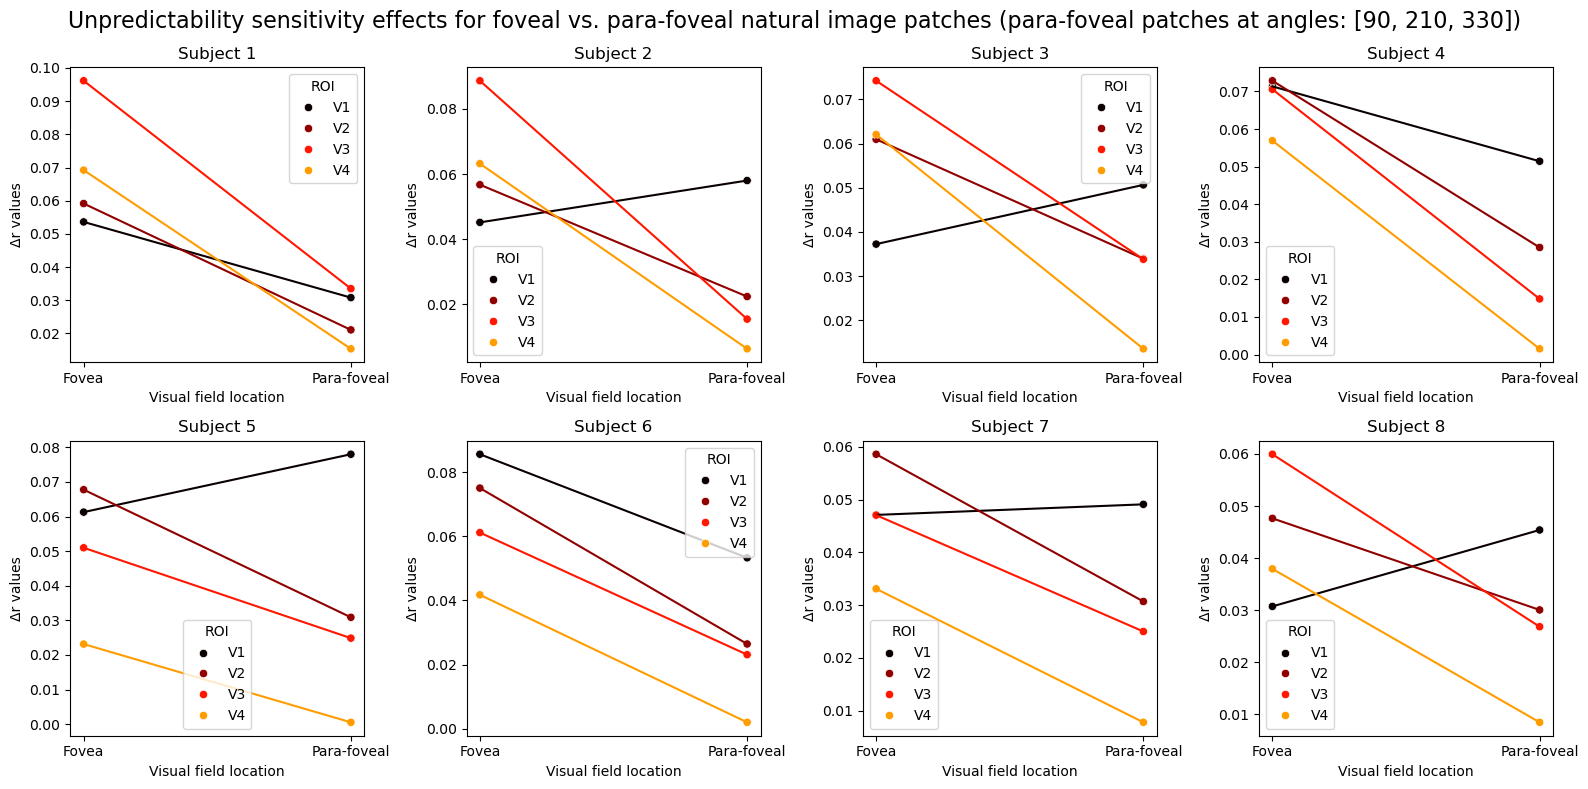

In [192]:
# for angle in [90, 210, 330]:
#     fovperi_plot(NSP.subjects, "beta_unpred", angles=[angle])
#     # fovperi_plot("subj01", "beta_unpred", angles=[angle])


fovperi_plot(NSP.subjects, "delta_r")



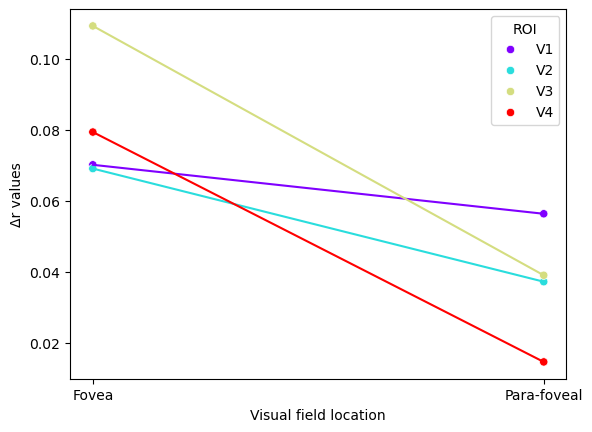

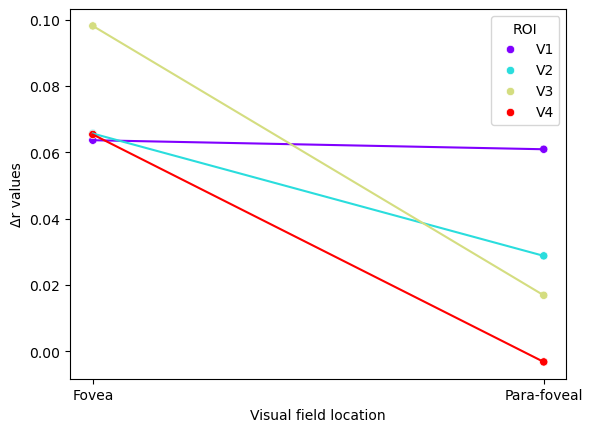

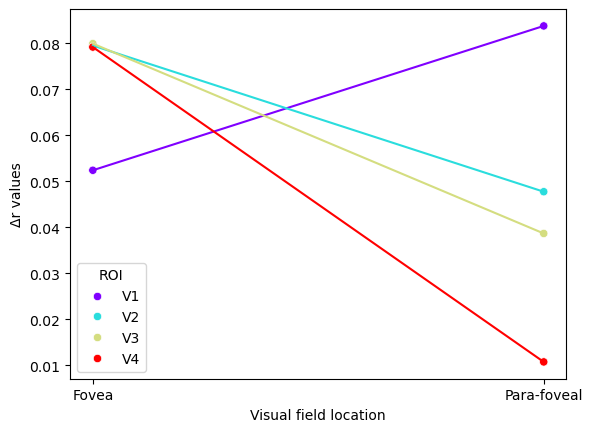

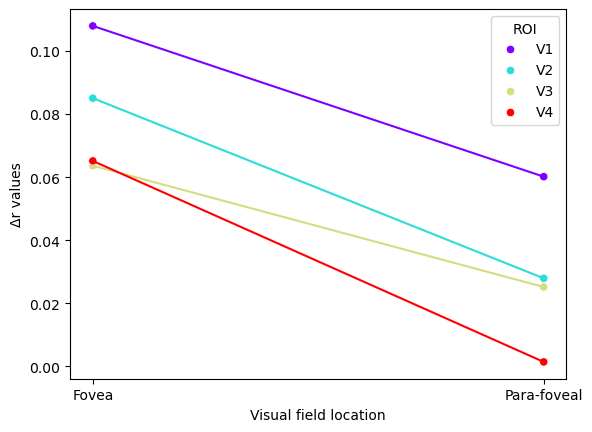

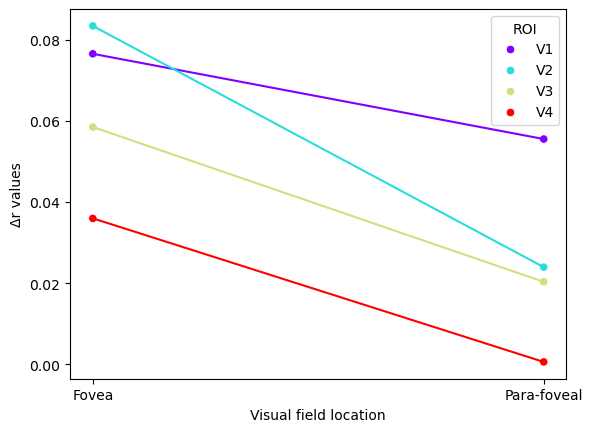

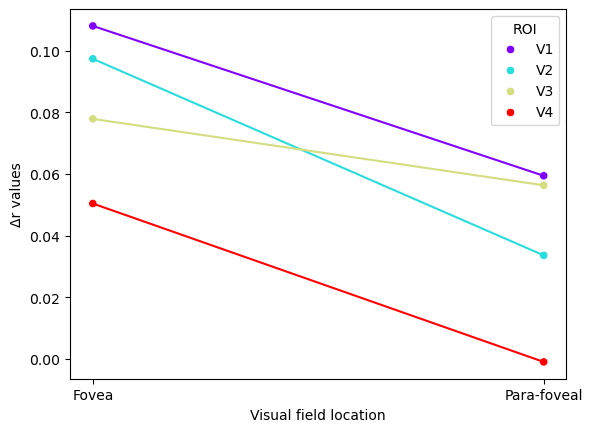

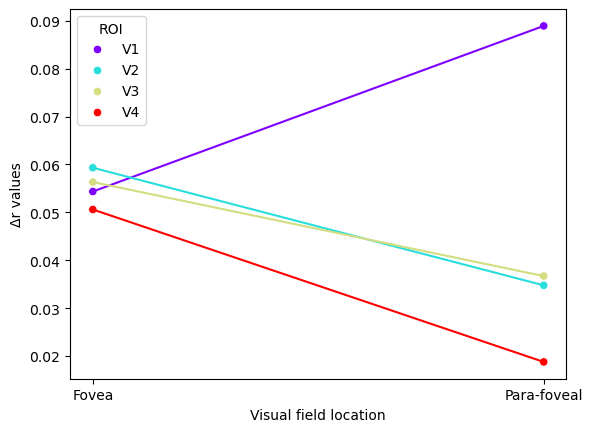

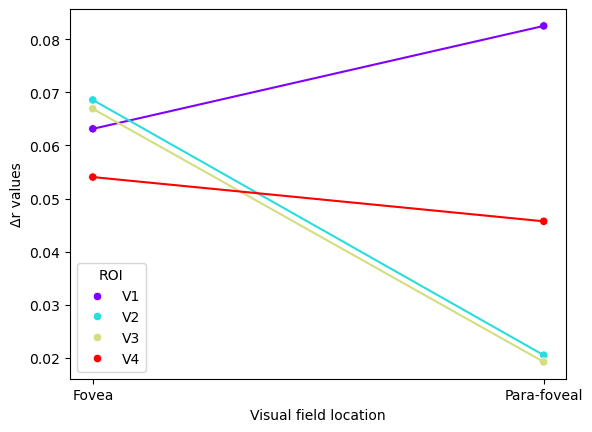

In [103]:

import warnings

# Ignore the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)


for subject in NSP.subjects:
    fovperi_plot(subject, "beta_unpred", angles=[330])


